___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
from numpy import arange

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

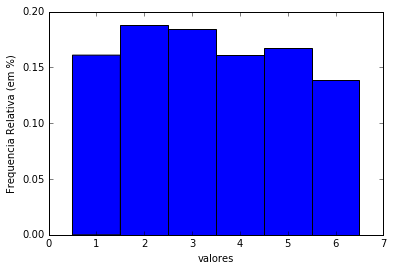

In [7]:
# a)
lista = []
intervalo = arange(0.5, 7, 1)
for i in range(0,1000):
    lista.append(randint(1,7))
plt.hist(lista, bins=intervalo, normed=1)
plt.ylabel("Frequencia Relativa (em %)")
plt.xlabel("valores")
# As probabilidades são, aproximadamente, igual a 16%, entretanto, as frequências relativas de ocorrência de cada face variam.

# b) A propabilidade de cada face é um valor teórico, e não absoluto (certo). Além disso, 1000 divido por 100 não dá um valor inteiro.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

Respostas:
a) Os resultados que dariam soma 7 são: (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1).
Jogando-se o dados duasvezes, a possibilidade de valores conjuntos é 6x6 = 36.
Portanto, a probabilidade de dar soma 7 é 6/36 = 1/6.

b) Após jogar o primeiro dado, independentemente do valor que foi obtido, o próximo dado poderá ter apenas um valor, cuja probabilidade de ocorrência é 1/6.
Dessa forma, calcula-se a probabilidade: P = (6x1)/36 = 1/6.
A probabilidade continua sendo a mesma pois os lançamentos de cada dado são fenômenos independentes uns dos outros.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [4]:
resultados = []

for i in range(0, 10000):
    porta_premiada = randint(1,4)
    porta_escolhida = randint(1,4)
    porta_aberta = 0
    while True:
        numero = randint(1,4)
        if numero != porta_escolhida and numero != porta_premiada:
            break
    if porta_escolhida == porta_premiada:
        resultados.append('ganha se trocar')
    else:
        resultados.append('perde se trocar')

numero_ganha = resultados.count('ganha se trocar')
numero_perde = resultados.count('perde se trocar')
total = len(resultados)

print('Frequencia relativa de vitorias (%):')
print(numero_ganha/total)
print('')
print('Frequencia relativa de derrotas (%):')
print(numero_perde/total)

Frequencia relativa de vitorias (%):
0.3302

Frequencia relativa de derrotas (%):
0.6698
